## 筛选出速度大于11的所有天数

In [35]:
import pandas as pd

import numpy as np



In [36]:
df_ais = pd.read_csv('../processed/AIS_hour_R_added.csv')
df_ais = df_ais.drop("Unnamed: 0", axis=1)
df_ais['postime'] = pd.to_datetime(df_ais['postime'],format='ISO8601')

df_collection = df_ais[df_ais['SOG']<11]

years = df_collection['postime'].dt.year
months = df_collection['postime'].dt.month
days = df_collection['postime'].dt.day
nums = df_collection['num']

new = pd.DataFrame(data=(years))
new = new.rename(columns={'postime': 'year'})

new2 = pd.DataFrame(data=(months))
new2 = new2.rename(columns={'postime': 'month'})

new3 = pd.DataFrame(data=(days))
new3 = new3.rename(columns={'postime': 'day'})

new4 = pd.DataFrame(data=(nums))
# new4 = new4.rename(columns={'postime': 'day'})

df_index = pd.concat([new, new2, new3, new4],  axis=1).reset_index(drop=True)
df_index = df_index.drop_duplicates(keep='first').reset_index(drop=True)


years = df_index['year']
months = df_index['month']
days = df_index['day']
nums = df_index['num']

df_index

,year,month,day,num
0,2021,1,12,1
1,2021,1,28,1
2,2021,2,2,1
3,2021,2,16,1
4,2021,2,28,1
...,...,...,...,...
1945,2024,10,21,13
1946,2024,11,8,13
1947,2024,11,17,13
1948,2024,11,22,13


In [ ]:
df_processed = pd.DataFrame(data=None,columns=['SOG','heading','draught', 'wind_val', 'wind_direction', 
                                               'wave_val', 'wave_direction', 'stream_val', 'stream_direction', 'postime', 'num', 'Pe', 'R_total', 'R_calm', 'R_added'])
df_processed = df_ais
for i in range(years.shape[0]):
    df_processed =df_processed.drop(df_processed[(df_processed['postime'].dt.year == years[i]) & (df_processed['postime'].dt.month == months[i]) &
                                                  (df_processed['postime'].dt.day == days[i]) & (df_processed['num'] == nums[i])].index)


df_processed

,SOG,heading,draught,wind_val,wind_direction,wave_val,wave_direction,stream_val,stream_direction,postime,num,Pe,R_total,R_calm,R_added
0,13.920000,32.000000,13.3,9.366000,41.000000,2.966000,37.400000,0.480000,211.200000,2021-01-04 00:00:00,1,9719.3250,1272.096154,857.693698,414.402457
1,13.950000,31.500000,13.3,9.710000,40.000000,2.990000,37.000000,0.510000,206.000000,2021-01-04 01:00:00,1,9719.3250,1264.955352,867.607558,397.347793
2,13.466667,32.333333,13.3,11.306667,36.000000,2.923333,37.666667,0.646667,191.000000,2021-01-04 02:00:00,1,9719.3250,1290.813827,832.668616,458.145212
3,13.300000,37.666667,13.3,11.386667,36.666667,2.996667,37.666667,0.646667,184.333333,2021-01-04 03:00:00,1,9719.3250,1316.660193,800.252772,516.407420
4,13.533333,35.000000,13.3,11.323333,36.666667,3.036667,37.333333,0.620000,182.333333,2021-01-04 04:00:00,1,9719.3250,1298.771084,822.438475,476.332608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130385,17.684615,209.461538,13.7,2.736154,11.307692,0.505385,37.307692,0.090769,101.769231,2024-11-30 19:00:00,13,11987.1675,1313.726778,1253.057211,60.669567
130386,17.720000,203.600000,13.7,6.772000,37.800000,1.376000,94.600000,0.446000,260.000000,2024-11-30 20:00:00,13,11987.1675,1351.678750,1177.116068,174.562682
130387,18.233333,202.777778,13.7,7.278889,47.111111,1.438889,91.777778,0.578889,253.222222,2024-11-30 21:00:00,13,11987.1675,1330.344329,1218.592534,111.751795
130388,17.780000,198.600000,13.7,4.704000,28.800000,0.882000,54.000000,0.342000,147.600000,2024-11-30 22:00:00,13,11987.1675,1342.227075,1195.188125,147.038950


<Axes: >

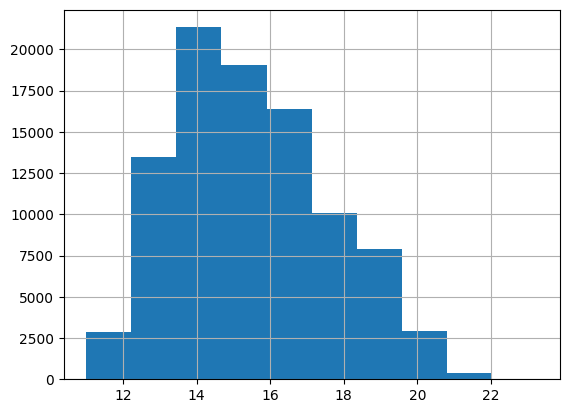

In [39]:
df_ais.SOG.hist()

In [20]:
# isin(df_temp['SOG']<11)

bb = df_temp['SOG']>12

if bb.all():
    flag = True
else:
    flag = False

bb

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8     False
9     False
10    False
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
Name: SOG, dtype: bool